In [87]:
import os
from pathlib import Path

import pandas as pd


catalog = pd.read_csv(Path(os.getenv('DATAPATH'), 'acmc', 'dfdt.csv')).drop(columns=["Unnamed: 0"])
frb = catalog.loc[8,:]
name, num = frb.subburstname.split("_")
dfdt = frb.dfdt_data

In [103]:
catalog

,subburstname,constrained,dfdt_data,dfdt_mc,dfdt_mc_low,dfdt_mc_high,duration_min
0,FRB20181128A_1,False,0.141884,0.423417,-0.103263,10.938142,31.716667
1,FRB20180917A_1,False,-0.122302,3.586000,-0.114078,9.994148,42.450000
2,FRB20180917A_2,False,-0.120243,12.754634,7.452885,9.729575,90.633333
3,FRB20181019A_1,False,-0.005497,1.928830,-0.026791,33.013404,67.333333
4,FRB20190208A_1,False,8.469193,1.517608,-0.118190,8.982507,44.933333
5,FRB20190208A_2,False,-0.117152,-0.551371,8.157900,8.584418,99.516667
6,FRB20181224E_1,False,24.556483,2.098887,-0.297798,-0.221905,22.983333
7,FRB20190421A_1,False,-4.046633,1.560487,-0.279379,-1.164549,44.033333
8,FRB20190124C_1,False,0.815176,3.569798,-0.236499,-0.196080,28.816667
9,FRB20190501B_1,False,-5.475063,1.798781,-0.327445,-0.525176,26.516667


d:\home\kerja\sarjana\.venv\lib\site-packages\sarjana\signal\transform.py:39: RuntimeWarning: Degrees of freedom <= 0 for slice.
  channel_variance = np.nanvar(wfall, axis=1)
d:\home\kerja\sarjana\.venv\lib\site-packages\sarjana\handlers.py:19: RuntimeWarning: Mean of empty slice
  data = np.nanmean(


[133 209 265]
[265 348]


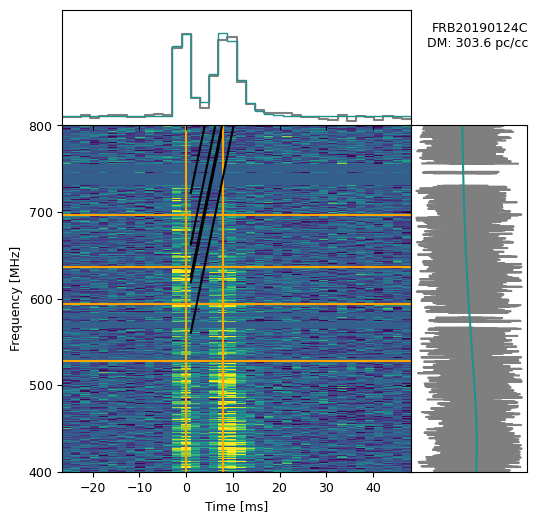

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

from sarjana.handlers import ParquetWaterfall

wfall = ParquetWaterfall(Path(os.getenv('DATAPATH'), 'raw', 'wfall', f'{name}_waterfall.h5.parquet'))
gs = wfall.plot_wfall()
im = plt.subplot(gs[2])

df = len(wfall.plot_freq) // wfall.wfall.shape[0]

for peak in wfall.peaks:
    avg_intensity = np.nansum(wfall.wfall[:, peak-1:peak+2], axis=1)
    avg_var = np.std(avg_intensity)
    avg = np.nanmean(avg_intensity)
    peak_freq, *_ = scipy.signal.find_peaks(avg_intensity, distance=len(avg_intensity)/10, height=np.abs(np.diff(avg_intensity).min()))
    print(peak_freq)
    # TODO adjust time scale based on plot's 0 line
    x_int = wfall.plot_time[peak] - wfall.plot_time[wfall.peaks[0]]
    im.axvline(x_int, color='orange')
    for peak_fq in peak_freq:
        im.axhline(wfall.plot_freq[::-df][peak_fq], color='orange')
        im.plot(wfall.plot_time, dfdt*(wfall.plot_time*df + x_int) + wfall.plot_freq[::-df][peak_fq], color='black')

In [12]:
mid = 3
np.array([0,1,2,3,4])[mid-1:mid+2]

array([2, 3, 4])